<a href="https://colab.research.google.com/github/garkul/Transcriptomics.msu/blob/master/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Домашнее задание 3</h1>
<h3> Гаркуль Лидия 4 курс ФББ</h3>

<b>Задание:</b>
<b>1)</b> Определите максимально правдоподобное распределение для наших даных. Попробуйте это сделать на случайной выборке из экспрессий 30 других генов. Согласованный ли получился результат? <br>

In [7]:
# Загрузка R magic
%load_ext rpy2.ipython

# Установка нужных пакетов
!Rscript -e 'install.packages("fitdistrplus", repos="https://cloud.r-project.org")'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/fitdistrplus_1.1-8.tar.gz'
Content type 'application/x-gzip' length 2434918 bytes (2.3 MB)
downloaded 2.3 MB

* installing *source* package ‘fitdistrplus’ ...
** package ‘fitdistrplus’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fitdistrplus)

The downloaded source packages are in
	‘/tmp/RtmpAWFm6j/downloaded_packages’


In [8]:
# Загрузка датасета
!gdown --id 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg
To: /content/LUAD_counts.tsv
100% 3.18M/3.18M [00:00<00:00, 124MB/s]


In [9]:
# Прочтение датасета
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("LUAD_counts.tsv", sep="\t", index_col=0)
df = df.T

In [ ]:
data = df.sample(n=30,axis='columns',replace=False)

In [ ]:
%%R
library(fitdistrplus)

In [ ]:
%%R -i data
a <- as.vector(data)

result <- data.frame(norm = rep(c(0), 30), nb = rep(c(0), 30), pois = rep(c(0), 30))


for (i in 1:30){
    b <- unlist(a[i])
    fit.norm <- fitdist(b, "norm")
    fit.nb <- fitdist(b, "nbinom")
    fit.pois  <- fitdist(b, "pois")
    result$norm[i] = fit.norm$aic
    result$nb[i] = fit.nb$aic
    result$pois[i] = fit.pois$aic
}

print(result)

        norm        nb         pois
1  680.21139 668.97126  20249.21036
2  616.86274 607.42627   9856.40262
3  592.24913 568.89987  10335.09859
4   -4.36594  19.98293     17.98293
5  784.90592 735.61691 135930.19302
6  570.86025 561.96289   6012.01090
7  755.99430 729.15753  82064.19171
8  507.45682 386.61987   6135.50083
9  214.46292 144.17550    212.51161
10 661.19173 640.65590  18521.29026
11 630.20040 598.27438  13794.72866
12 366.83260 350.74940    716.53127
13 513.38907 438.80674   5386.65827
14 752.32683 707.38149 110266.29475
15 579.50153 549.96463   7873.68463
16 644.38427 638.76344  14937.86085
17 677.00109 663.60206  19930.55464
18 559.64799 543.84011   6116.89136
19 795.19952 732.11576 159419.63100
20 267.68245 210.40331    367.27280
21 688.25463 672.71793  24173.96787
22 636.32806 568.39929  22723.93064
23  21.19726  30.42068     28.42068
24 634.00538 627.35206  11433.69081
25 603.01680 586.66047   8295.27706
26 617.27582 608.32392  10294.19325
27 599.16622 420.39844  1949

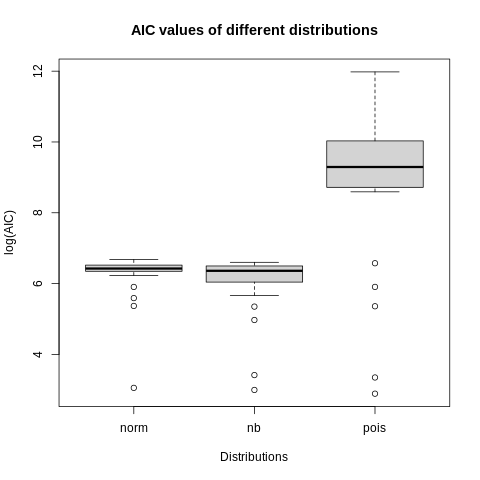

In [ ]:
%%R
boxplot(log(result), main="AIC values of different distributions", xlab="Distributions", ylab="log(AIC)")

У отрицательного биномиального распределения (<b>nb</b>) наблюдается наимешьшая медиана и достальночно маленький межквартильный размах. У нормального распределения (<b>norm</b>) тоже достаточно низкое значение медианы и наименьший межквартильный размах. <br>Оба распределения достаточно хорошо описывают наши данные. При этом отрицительное биномиальное распределение описывает дискретные величины, а нормальное - непрерывные. Поэтому в качестве описания наших данных я бы выбрала <b>отрицательное биномиальное</b>.
<br> Маленький межквартильный размах и отсутствие выбросов в сторону больших значение говорят о том, что nb хорошо описывает поведение экспрессий большинства из нашей выборки. <br><br>
У распределения Пуассона наблюдается большой размах значений AIC. Вероятно, это связано с тем, что Пуассон достаточно хорошо может описывать распределения низких экспрессий и плохо распределения высоких экспрессий. Возьмем один низкоэкспрессируемый ген и один высокоэкспрессируемый ген и построим для них несколько графиков. 

In [ ]:
lil_exp = df['TNMD']
big_exp = df['CFH']

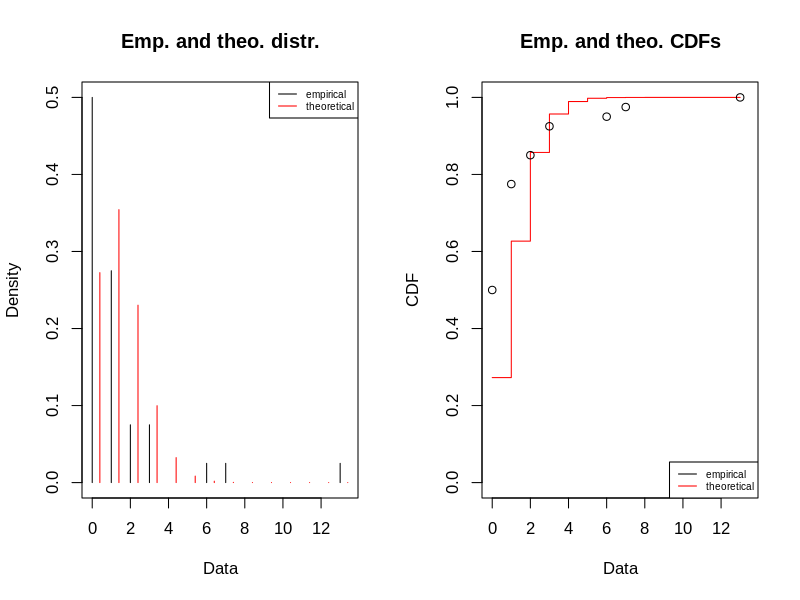

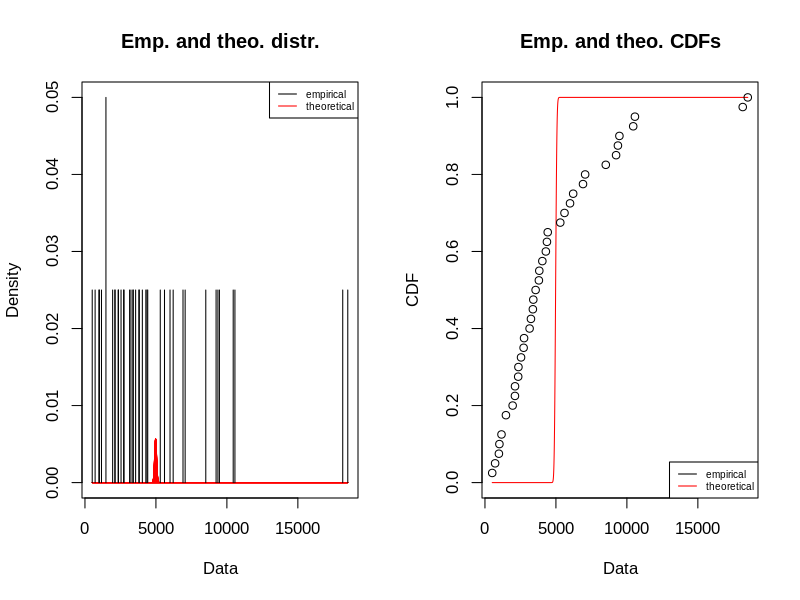

In [ ]:
%%R -i lil_exp -i big_exp -r 100 -w 800 -h 600

lil <- as.vector(lil_exp)
big <- as.vector(big_exp)
fit.pois.lil  <- fitdist(lil, "pois")
fit.pois.big  <- fitdist(big, "pois")
plot(fit.pois.lil)
plot(fit.pois.big)


<b>2)</b> Скачайте датасет <code>1M8-86VecaYPERovPk4JKhT2lLa4PfJxi</code> из статьи <a href="https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-13-304#Sec8">Oberg et al., 2012</a>.. Внимательно прочитайте статью и изучите дизайн эксперимента — какие реплики в статье называют техническими, а какие — биологическими? Правда ли в технических репликах наблюдается распределение Пуассона?

In [ ]:
# Загрузка датасета
!gdown --id 1M8-86VecaYPERovPk4JKhT2lLa4PfJxi

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M8-86VecaYPERovPk4JKhT2lLa4PfJxi
To: /content/GSE29022_gene_counts.txt
100% 2.76M/2.76M [00:00<00:00, 206MB/s]


In [ ]:
#Прочтение датасета
df_2 = pd.read_csv("GSE29022_gene_counts.txt", sep="\t")
df_2

,sample4019.flowcell30WPLAAXX.lane5,sample4019.flowcell30WPLAAXX.lane6,sample6045.flowcell30WP5AAXX.lane1,sample6045.flowcell30WP5AAXX.lane2,sample2550.flowcell305TMAAXX.lane3,sample2550.flowcell305TMAAXX.lane4,sample1286.flowcell305TMAAXX.lane7,sample1286.flowcell305TMAAXX.lane8,sample6113.flowcell30WFYAAXX.lane3,sample6113.flowcell30WFYAAXX.lane4,...,sample1353.flowcell42KV5AAXX.lane7,sample1353.flowcell42KV5AAXX.lane8,sample56.flowcell42KT7AAXX.lane3,sample56.flowcell42KT7AAXX.lane4,sample7954.flowcell42KT7AAXX.lane7,sample7954.flowcell42KT7AAXX.lane8,sample6310.flowcell312M0AAXX.lane3,sample6310.flowcell312M0AAXX.lane4,sample86.flowcell312M0AAXX.lane7,sample86.flowcell312M0AAXX.lane8
0,785,761,794,888,873,836,930,874,1053,1050,...,2173,2043,2301,2552,1252,1115,2516,2495,1835,1761
1,527,501,466,581,259,259,321,361,381,391,...,786,720,759,780,1122,1084,803,731,785,679
2,3,2,3,1,1,1,2,2,2,3,...,1,5,4,3,1,2,0,2,4,4
3,117,129,80,71,61,52,74,70,55,74,...,202,176,141,133,194,198,157,161,192,189
4,30,30,19,34,16,21,15,24,16,21,...,33,32,19,22,43,37,28,26,52,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17348,20,15,8,16,10,6,10,15,19,17,...,34,18,11,18,15,17,13,13,29,31
17349,165,196,214,205,115,125,120,137,168,180,...,324,297,451,428,516,454,465,445,312,298
17350,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17351,25,30,32,18,38,37,20,20,52,46,...,89,65,27,22,25,43,50,51,57,47


<b>Технические реплики</b> - реплики, в которых ожидается наблюдение только "технической" дисперсии. То есть дисперсии, обусловленной разницей в обработке образцов. В данной статье авторы называли техническими репликами секвенирование разных дорожек одной и той же библиотеки. Распределены по Пуассону. <br>
<b>Биологические реплики</b> - реплики, в которых ожидается наблюдение и технической и биологической дисперсии. В данной статье авторы называли биологическими репликами секвенирование образцов (одинаковых видов) из разных библиотек. Из-за того, что дисперсия в данном случае представляет собой сумму частей как технической, так и биологической изменчивости, то дисперсия оказывается больше среднего. То есть данные не распределены по Пуассону. В данном случае обычно наблюдается отрицательное биноминальное распределение.

Возьмем две технические реплики. Согласно статье, такие реплики находятся в образцах с названием lane1 и lane2; lane3 и lane4; lane5 и lane6; lane7 и lane8 любой проточной ячейке. <br>
Выберем **sample4019.flowcell30WPLAAXX.lane5** и **sample4019.flowcell30WPLAAXX.lane6**.

In [ ]:
df_2 = df_2.get(["sample4019.flowcell30WPLAAXX.lane5", "sample4019.flowcell30WPLAAXX.lane6"])
df_2 = df_2.T
df_2

,0,1,2,3,4,5,6,7,8,9,...,17343,17344,17345,17346,17347,17348,17349,17350,17351,17352
sample4019.flowcell30WPLAAXX.lane5,785,527,3,117,30,14,1,1799,46,50,...,103,0,6,49,0,20,165,0,25,220
sample4019.flowcell30WPLAAXX.lane6,761,501,2,129,30,11,3,1873,43,37,...,102,0,9,50,0,15,196,0,30,218


In [ ]:
means = np.mean(df_2)
vars = np.var(df_2)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

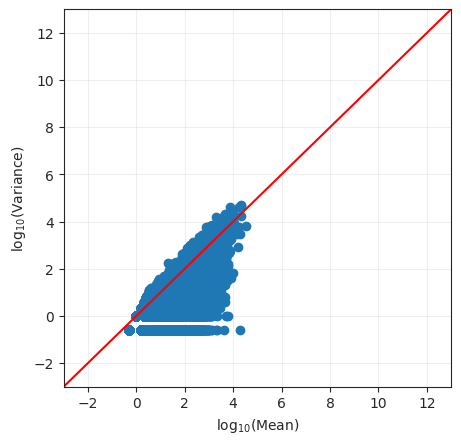

In [ ]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 13], [-3, 13], color="red")
ax.set_xlim(-3, 13)
ax.set_ylim(-3, 13)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

что за фигьня

<b>3)</b> Проделайте подобную процедуру с каунтами генов, которые вы получили в результате анализа <a href="https://www.nature.com/articles/s41598-018-23226-4">статьи</a> со сравнением методов подготовки библиотек для scRNA-Seq (`1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek`). Разберитесь, что в случае этой работы называют технической репликой. Актуально ли распределение Пуассона в случае таких технических реплик?

In [1]:
# Загрузка датасета
!gdown --id 1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek
To: /content/polyA_total_counts.tsv
100% 1.87M/1.87M [00:00<00:00, 54.9MB/s]


In [4]:
!head polyA_total_counts.tsv

	colon_polyA_3	colon_polyA_4	colon_polyA_1	colon_polyA_2	colon_total_3	colon_total_4	colon_total_1	colon_total_2	pbmc_polyA_3	pbmc_polyA_4	pbmc_polyA_1	pbmc_polyA_2	pbmc_total_3	pbmc_total_4	pbmc_total_1	pbmc_total_2
MAFIP	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
KIR3DL2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0


In [15]:
df_3 = pd.read_csv("polyA_total_counts.tsv", sep="\t")
df_3 = df_3.set_index('Unnamed: 0')
df_3.index.names = [None]
df_3 = df_3.T
df_3

,MAFIP,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,...,PRY,BPY2,DAZ1,DAZ2,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
colon_polyA_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,0,0,0
colon_polyA_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_polyA_1,0,0,0,0,0,0,0,0,0,0,...,0,26,0,0,0,0,0,0,63,0
colon_polyA_2,0,0,0,0,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,0,0
colon_total_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_total_4,0,0,0,0,0,0,0,0,0,0,...,117,0,0,0,0,0,0,0,0,0
colon_total_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_total_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pbmc_polyA_3,0,0,0,0,0,0,0,0,0,0,...,1011,76,560,158,0,34,107,46,279,527
pbmc_polyA_4,0,0,0,0,0,0,0,0,0,0,...,934,76,736,207,0,142,180,206,145,301


In [20]:
means_3 = np.mean(df_3)
vars_3 = np.var(df_3)

means_3 = means_3[vars_3 > 0]
vars_3 = vars_3[vars_3 > 0]

means_3 = np.log10(means_3)
vars_3 = np.log10(vars_3)

Text(0, 0.5, 'log$_{10}$(Variance)')

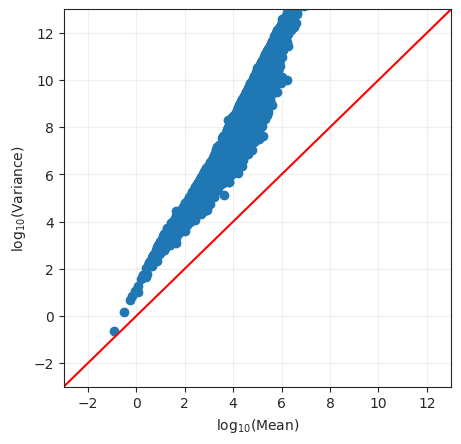

In [23]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

ax.scatter(means_3, vars_3)
ax.plot([-3, 13], [-3, 13], color="red")
ax.set_xlim(-3, 13)
ax.set_ylim(-3, 13)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

**Теническими повторами** в данной статье называют секвенирование 4 разных пробирок с одним образцом, выделение РНК из которых было проведено по одинаковому протоколу. 

На диаграмме рассеяния наблюдается явление сверхдисперсии. Значит, данные распределены не по Пуассону. <br>
Вероятно, это связано с тем, что в ходе отдельной подготовки образцов возникает много различий в процедуре (из-за человеческого фактора, например). И в таком случае возникает отрицательное биномиальное распределение. 